# 加载包


In [11]:
# 基础
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

# 预处理
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer, quantile_transform

# 统计
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import randint

# 特征工程
from sklearn.feature_selection import mutual_info_regression

# transformers and pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config

# 机器学习算法
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.svm import SVR

# 模型评估
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import optuna
from optuna.samplers import TPESampler
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

# 回归器
from sklearn.ensemble import StackingRegressor
from mlxtend.regressor import StackingCVRegressor




# 初步查看数据

In [12]:
# 查看数据
original_train_df = pd.read_csv('./train.csv', index_col='Id')
original_test_df = pd.read_csv('./test.csv', index_col='Id')

# 预留作流水线
pipe_data = original_train_df.copy()
pipe_test = original_test_df.copy()

# 用于初步分析
train_df = original_train_df.copy()
test_df = original_test_df.copy()
train_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

## 数值型和类别型数据的描述性统计

In [13]:
# 数值型数据描述性统计
train_df.describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

In [14]:
# 分类型数据描述性统计
train_df.describe(include='object').T.sort_values(by=['unique'], ascending=False)

count unique      top  freq
Neighborhood   1460     25    NAmes   225
Exterior2nd    1460     16  VinylSd   504
Exterior1st    1460     15  VinylSd   515
SaleType       1460      9       WD  1267
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
HouseStyle     1460      8   1Story   726
RoofMatl       1460      8  CompShg  1434
Functional     1460      7      Typ  1360
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
RoofStyle      1460      6    Gable  1141
SaleCondition  1460      6   Normal  1198
BsmtFinType1   1423      6      Unf   430
GarageType     1379      6   Attchd   870
Foundation     1460      6    PConc   647
Electrical     1459      5    SBrkr  1334
FireplaceQu     770      5       Gd   380
HeatingQC      1460      5       Ex   741
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
MSZoning       1460      5       RL  1151
LotConfig      1460      5   Inside  1052
ExterCond      1460      5       TA  1282
BldgType       1460      5     1Fam  1220
BsmtExposure   1422      4       No   953
MiscFeature      54      4     Shed    49
Fence           281      4    MnPrv   157
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
BsmtCond       1423      4       TA  1311
KitchenQual    1460      4       TA   735
ExterQual      1460      4       TA   906
BsmtQual       1423      4       TA   649
LandSlope      1460      3      Gtl  1382
GarageFinish   1379      3      Unf   605
MasVnrType      588      3  BrkFace   445
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Utilities      1460      2   AllPub  1459
CentralAir     1460      2        Y  1365
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50

## 缺失值

**有许多缺失值，让我们统计并可视化它们**

In [15]:
missing = pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False))
missing.columns = ["count"]
missing = missing.loc[(missing != 0).any(axis=1)]
missing["percent"] = missing[0:] / 1460
missing.style.background_gradient('viridis')

## 特征分组为预处理做准备

不同的数据类型需要不同的预处理方法。这里，我将对特征进行分组，以便于管理和预处理。

In [16]:
# 特征分组为预处理做准备

# 类别型特征
categorical_features = [feature for feature in train_df.columns if
                        train_df[feature].dtype == "object"]

# 名义型特征
nominal_features = ["MSZoning", "Street", "Alley", "LandContour", "LotConfig", "Neighborhood", "Condition1",
                    "Condition2",
                    "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType",
                    "Foundation", "Heating",
                    "CentralAir", 'Electrical', "GarageType", "MiscFeature", "SaleType", "SaleCondition"]

# 有序型特征
ordinal_features = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                    'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
                    'GarageQual',
                    'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

# 数字型特征
numerical_features = [feature for feature in train_df.columns if feature not in categorical_features + ['SalePrice']]

# 数值型特征离散型
discrete_numerical_features = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
                               'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                               'GarageCars', 'MoSold', "MSSubClass"]

# 数值型特征连续型
continuous_numerical_features = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                 'BsmtFinSF2',
                                 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                                 'GarageYrBlt',
                                 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                                 'PoolArea',
                                 'MiscVal', 'YrSold']

# 检查是否有遗漏的特征
assert categorical_features.sort() == (nominal_features + ordinal_features).sort()
assert numerical_features.sort() == (discrete_numerical_features + continuous_numerical_features).sort()

<a id = "4"></a><br>
# 探索性数据分析

让我们观察目标变量随特征的变化情况。

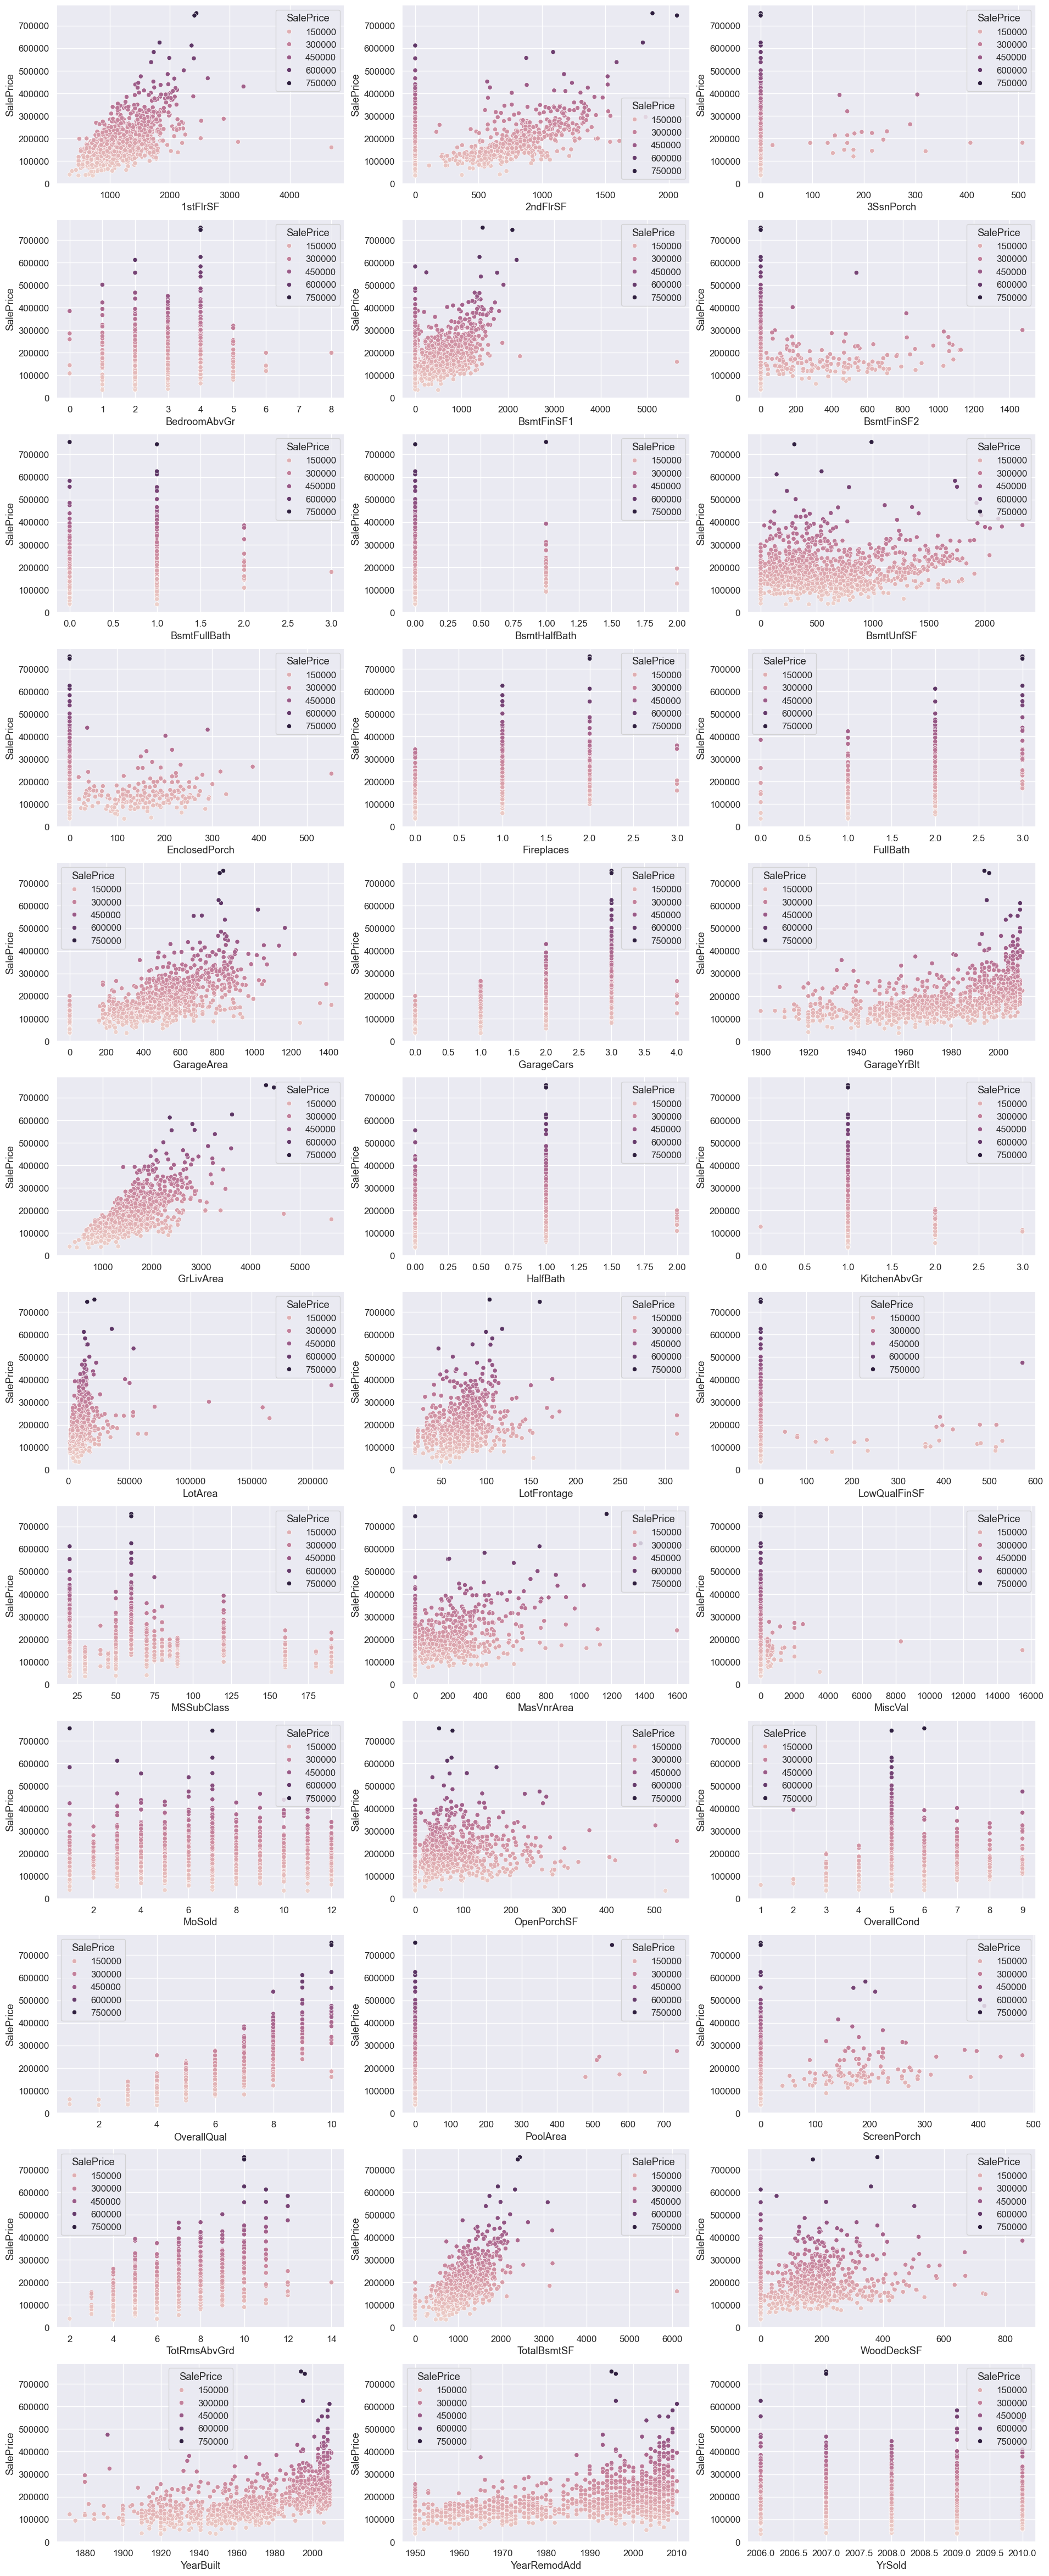

In [17]:
fig, ax = plt.subplots(12, 3, figsize=(23, 60))
for var, subplot in zip(numerical_features, ax.flatten()):
    sns.scatterplot(x=var, y='SalePrice', data=train_df, ax=subplot, hue='SalePrice')


观察结果：
* 地下室、一楼和二楼的面积与目标变量有较强的相关性
* 整体质量也与目标变量有较强的相关性
* 数据集中存在一些异常值，接下来我们将剔除它们

In [18]:

train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 4000)
                                  & (train_df['SalePrice'] < 200000)].index)
train_df = train_df.drop(train_df[(train_df['GarageArea'] > 1200)
                                  & (train_df['SalePrice'] < 300000)].index)
train_df = train_df.drop(train_df[(train_df['TotalBsmtSF'] > 4000)
                                  & (train_df['SalePrice'] < 200000)].index)
train_df = train_df.drop(train_df[(train_df['1stFlrSF'] > 4000)
                                  & (train_df['SalePrice'] < 200000)].index)

train_df = train_df.drop(train_df[(train_df['TotRmsAbvGrd'] > 12)
                                  & (train_df['SalePrice'] < 230000)].index)
y = train_df.SalePrice

**让我们用更量化的方式来观察特征与目标变量之间的相关性。**

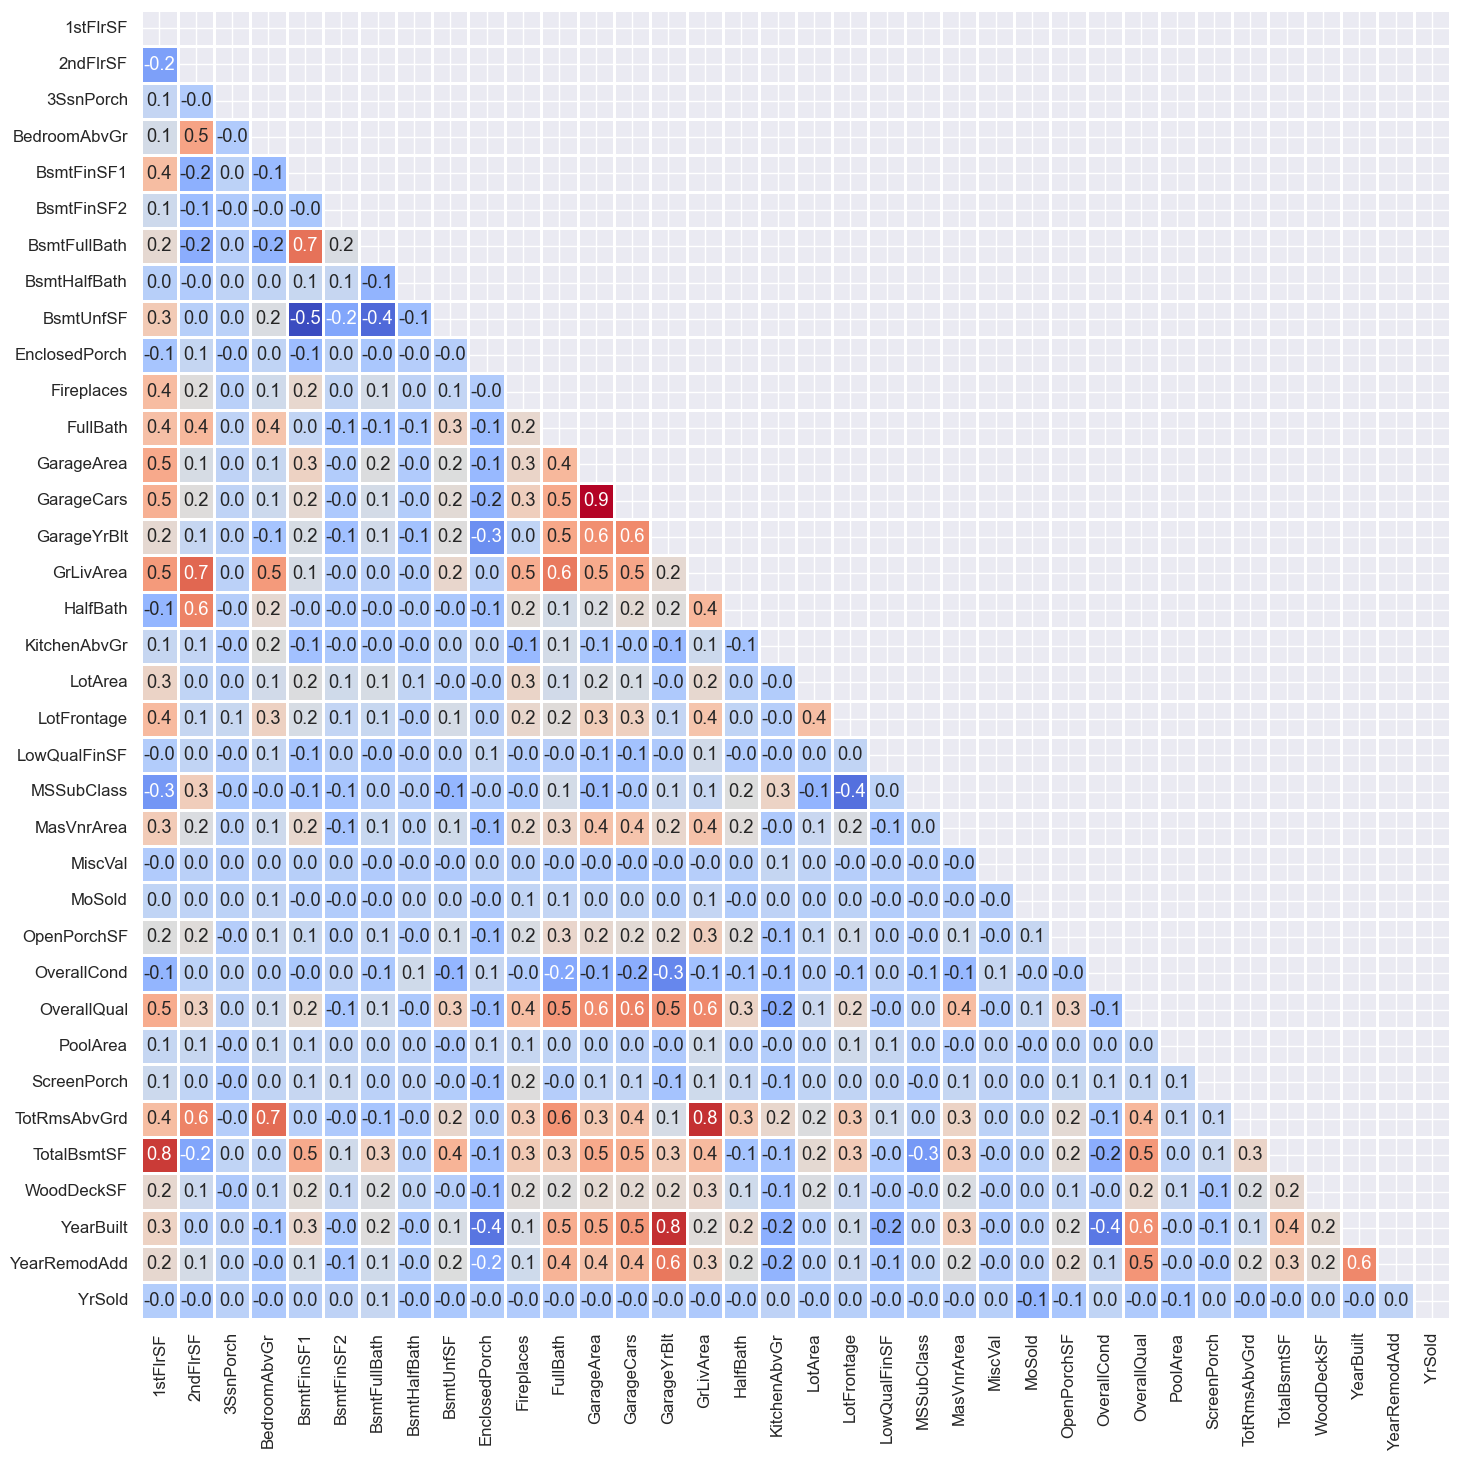

In [20]:
# 显示数值型特征与SalePrice之间的相关性热力图

sns.set(font_scale=1.1)
correlation_train = train_df[numerical_features].corr()
mask = np.triu(correlation_train)
plt.figure(figsize=(17, 17))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False);

有许多与目标变量相关的特征，这是个好消息...

相关性是理解特征与目标变量关系的一个很好的度量，但它只衡量线性关系。

互信息是另一种度量方法，能够捕捉更多样化的关系。

注意，这两种度量方法都只适用于单变量分析，无法检测多变量关系。

让我们检查数值型特征的互信息...


In [21]:
# 计算数值型特征的互信息
# 需要先用fillna填充缺失值，才能得到mutual_info_regression函数的结果
mutual_df = train_df[numerical_features]

mutual_info = mutual_info_regression(mutual_df.fillna(0), y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns=["Numerical_Feature_MI"]).style.background_gradient(
    "cool")


互信息同样适用于预处理过的类别变量。让我们看看哪些类别特征与房价（SalePrice）有较强的关系。

In [22]:
mutual_df_categorical = train_df[categorical_features]

# 对类别特征进行编码，因互信息计算需要数值输入
for colname in mutual_df_categorical:
    mutual_df_categorical[colname], _ = mutual_df_categorical[colname].factorize()

# 计算类别特征与目标变量的互信息，填充缺失值为特定字符串
mutual_info = mutual_info_regression(mutual_df_categorical.fillna("Do_not_have_feature"), y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df_categorical.columns

# 将互信息结果按降序排序并以渐变色显示
pd.DataFrame(mutual_info.sort_values(ascending=False), columns=["Categorical_Feature_MI"]).style.background_gradient(
    "cool")


让我们观察与目标变量SalePrice互信息得分最高的类别变量之间的关系。可以看到，这些类别特征中不同类别对应的平均房价差异较大。

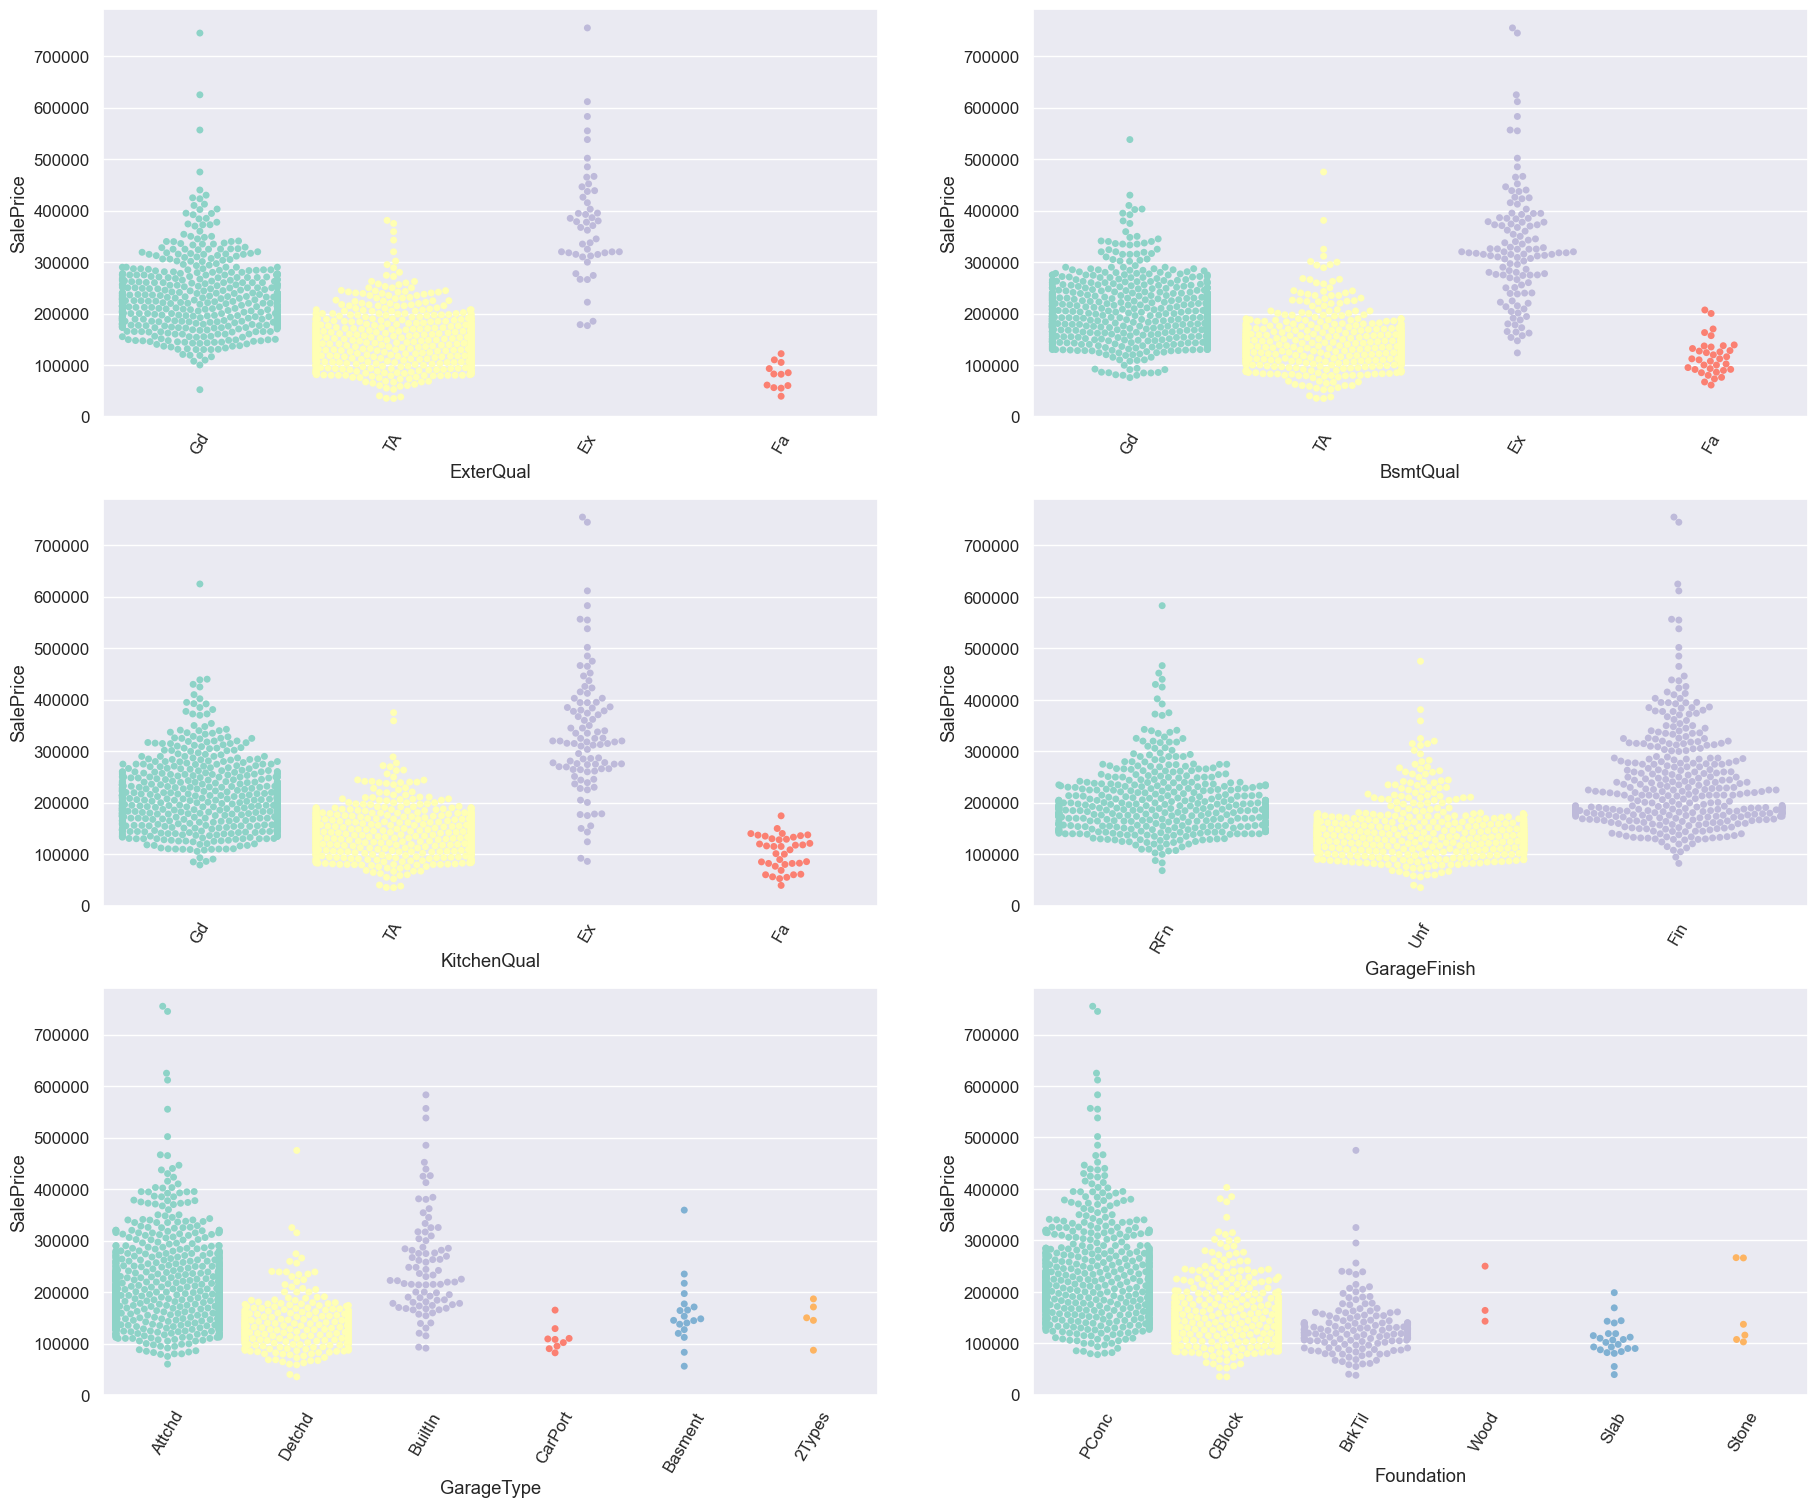

In [23]:
categorical_champions = ["ExterQual", "BsmtQual", "KitchenQual", "GarageFinish", "GarageType", "Foundation"]

fig, ax = plt.subplots(3, 2, figsize=(22, 18))
for var, subplot in zip(categorical_champions, ax.flatten()):
    sns.swarmplot(x=var, y='SalePrice', data=train_df, ax=subplot, palette='Set3')
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=60)


**让我们也观察互信息得分较高的数值型特征。**

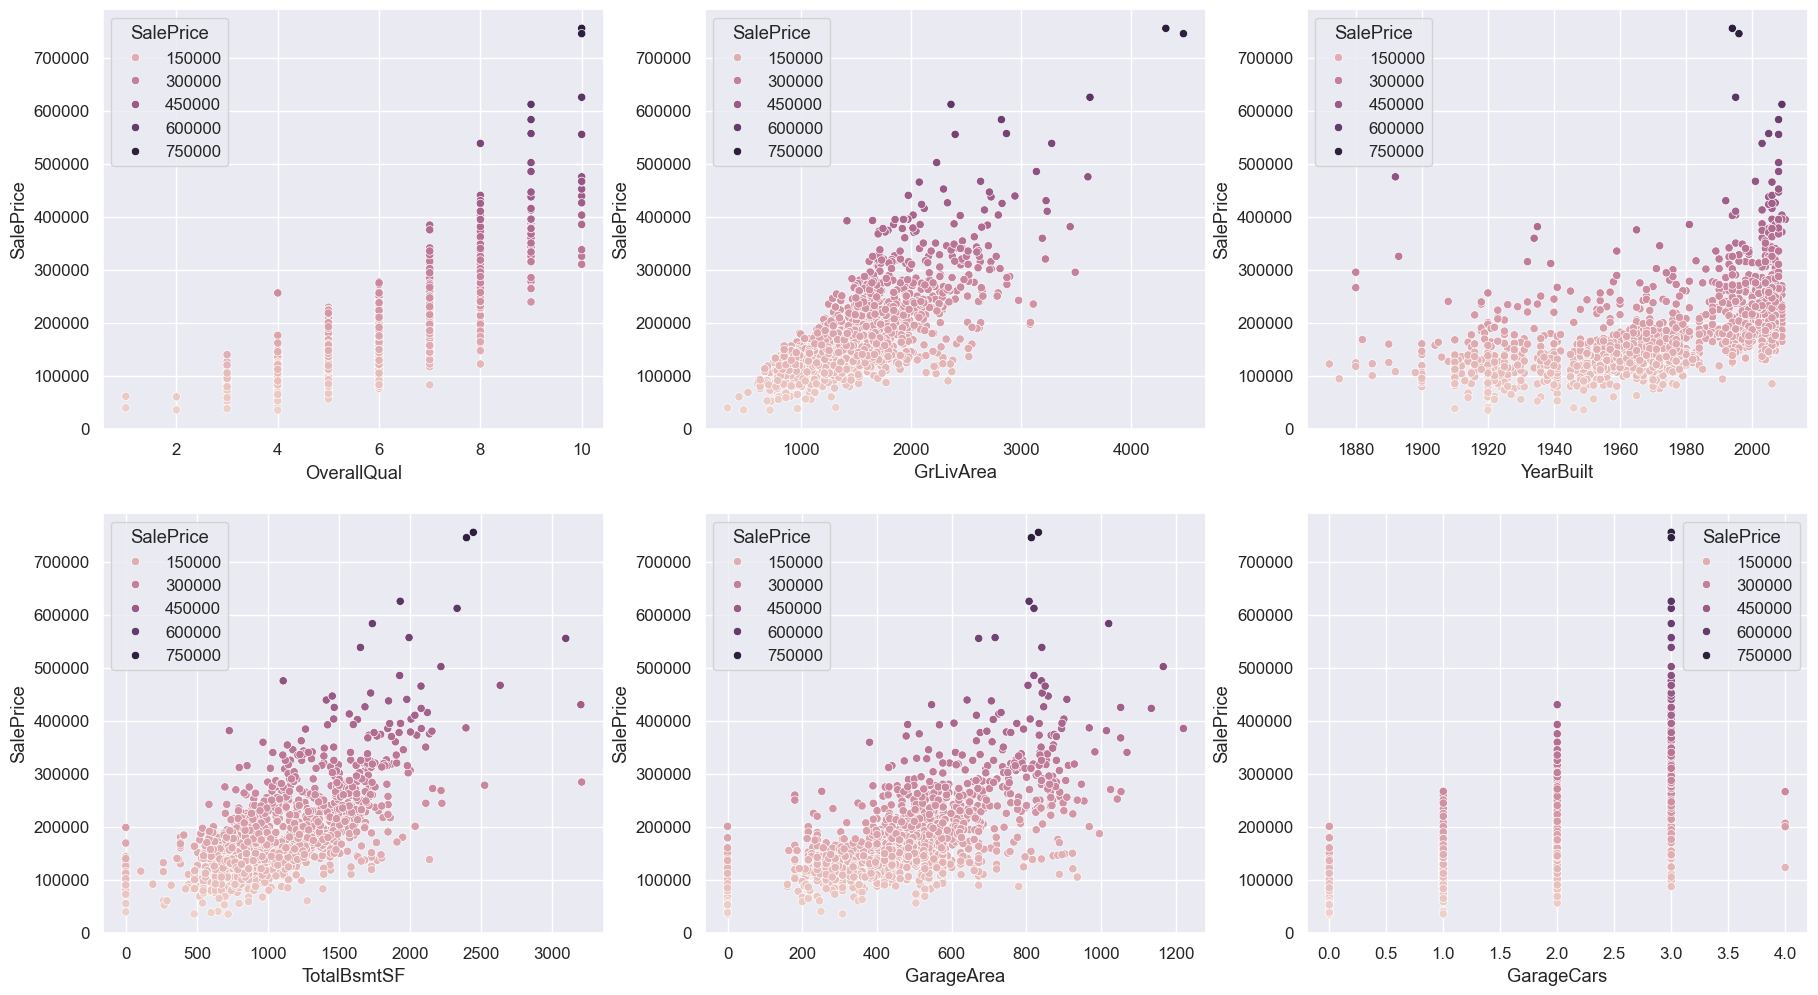

In [24]:
numerical_champions = ["OverallQual", "GrLivArea", "YearBuilt", "TotalBsmtSF", "GarageArea", "GarageCars"]

fig, ax = plt.subplots(2, 3, figsize=(22, 12))
for var, subplot in zip(numerical_champions, ax.flatten()):
    sns.scatterplot(x=var, y='SalePrice', data=train_df, ax=subplot, hue='SalePrice')


<a id = "5"></a><br>
# 特征工程

机器学习算法有其自身探索数据中多变量关系的方法，但默认情况下它们无法探索所有关系。
例如，回归模型仅试图优化特征的系数，而不关注特征之间的其他算术运算。
树模型则专注于找到最佳的分割点，而不关心其他方面。
因此，显式地定义由原始特征派生的新特征非常有帮助。

In [25]:
train_df["Lack_of_feature_index"] = train_df[["Street", "Alley", "MasVnrType", "GarageType", "MiscFeature", 'BsmtQual',
                                              'FireplaceQu', 'PoolQC', 'Fence']].isnull().sum(axis=1) + (
                                            train_df["MasVnrType"] == 'None') + (train_df["CentralAir"] == 'No')
train_df["MiscFeatureExtended"] = (train_df["PoolQC"].notnull() * 1 + train_df["MiscFeature"].notnull() * 1 + train_df[
    "Fence"].notnull() * 1).astype('int64')
train_df["Has_Alley"] = train_df["Alley"].notnull().astype('int64')
train_df["Lot_occupation"] = train_df["GrLivArea"] / train_df["LotArea"]
train_df["Number_of_floors"] = (train_df["TotalBsmtSF"] != 0).astype('int64') + (train_df["1stFlrSF"] != 0).astype(
    'int64') + (train_df["2ndFlrSF"] != 0).astype('int64')
train_df['Total_Close_Live_Area'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
train_df['Outside_live_area'] = train_df['WoodDeckSF'] + train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df[
    '3SsnPorch'] + train_df['ScreenPorch']
train_df['Total_usable_area'] = train_df['Total_Close_Live_Area'] + train_df['Outside_live_area']
train_df['Area_Quality_Indicator'] = train_df['Total_usable_area'] * train_df['OverallQual']
train_df['Area_Qual_Cond_Indicator'] = train_df['Total_usable_area'] * train_df['OverallQual'] * train_df['OverallCond']
train_df['TotalBath'] = (train_df['FullBath'] + (0.5 * train_df['HalfBath']) + train_df['BsmtFullBath'] + (
        0.5 * train_df['BsmtHalfBath']))
train_df["Has_garage"] = train_df["GarageYrBlt"].notnull().astype('int64')
train_df['House_Age'] = train_df['YrSold'] - train_df['YearBuilt']
train_df["Is_Remodeled"] = (train_df["YearBuilt"] != train_df["YearRemodAdd"]).astype('int64')
train_df['HasBsmt'] = train_df['BsmtQual'].notnull().astype('int64')
train_df['Quality_conditition'] = train_df['OverallQual'] * train_df['OverallCond']
train_df['Quality_conditition_2'] = train_df['OverallQual'] + train_df['OverallCond']
train_df['House_Age2'] = train_df['YrSold'] - train_df['YearRemodAdd']

new_features = list(set(train_df.columns) - set(categorical_features + numerical_features + ['SalePrice']))
new_continuous_features = ["Lot_occupation", 'Total_Close_Live_Area', 'Outside_live_area', 'Total_usable_area',
                           'Area_Quality_Indicator', 'House_Age', 'Area_Qual_Cond_Indicator', 'Quality_conditition',
                           'House_Age2']
new_discrete_features = ["Lack_of_feature_index", "MiscFeatureExtended", "Has_Alley", "Number_of_floors", "Has_garage",
                         "Is_Remodeled", 'TotalBath', 'HasBsmt', 'Quality_conditition_2']

assert new_features.sort() == (new_discrete_features + new_continuous_features).sort()


**让我们检查新特征的互信息得分...**

In [26]:
mutual_df = train_df[new_features]

mutual_info = mutual_info_regression(mutual_df.fillna(0), y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns=["New_Feature_MI"]).style.background_gradient("cool")

是的……一些新特征的互信息得分高于原始特征，这无疑是个好消息。

让我们也观察散点图。你会看到一些新特征与目标变量之间存在较高的相关性。

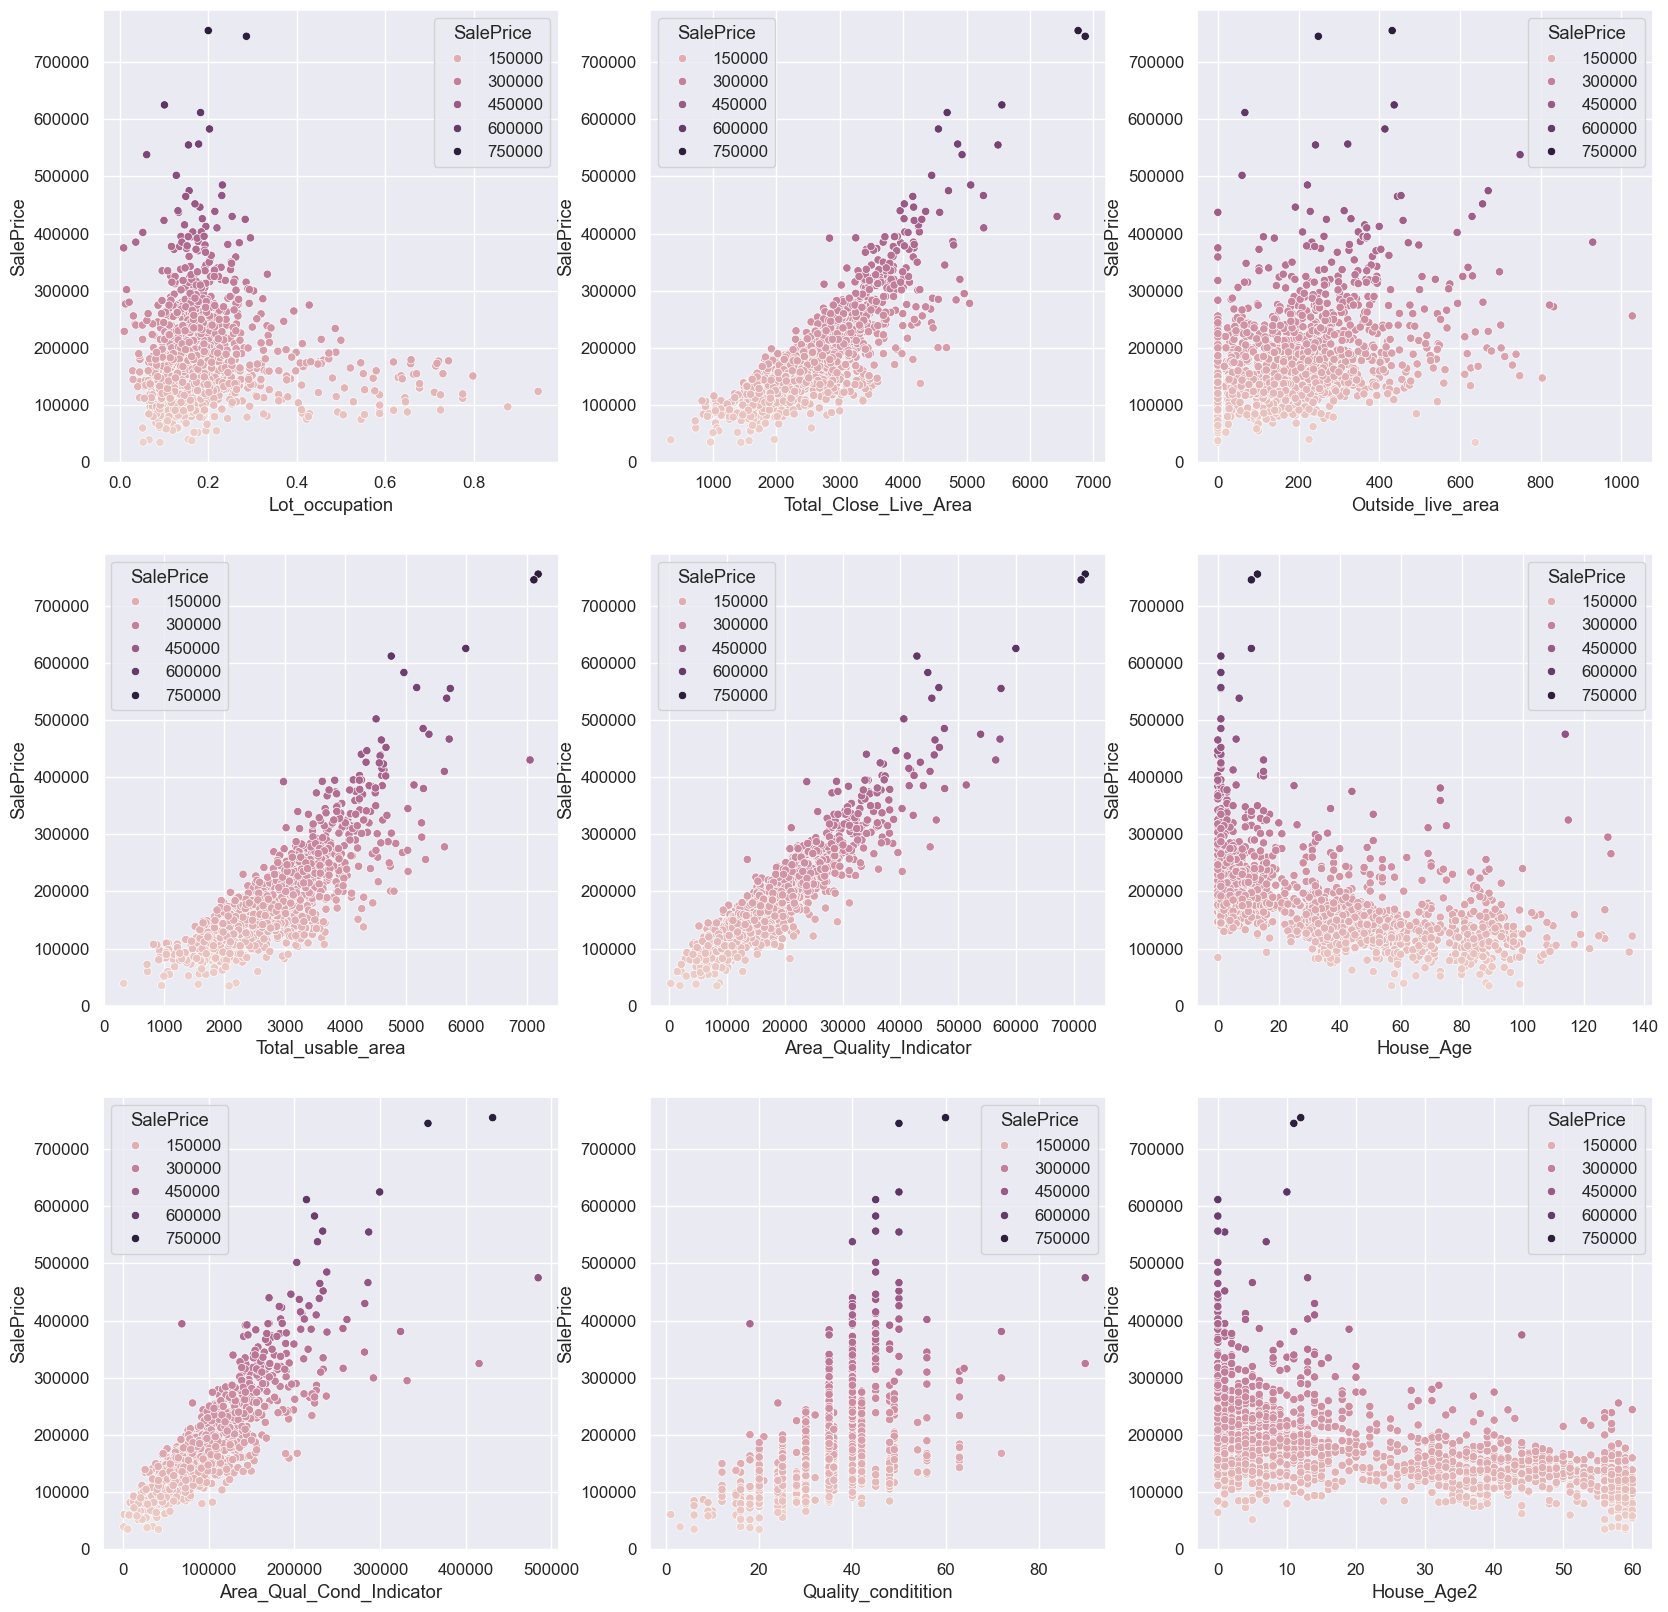

In [27]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for var, subplot in zip(new_continuous_features, ax.flatten()):
    sns.scatterplot(x=var, y='SalePrice', data=train_df, ax=subplot, hue='SalePrice')

一些新的类别特征表现良好。不同类别对应的SalePrice均值存在差异。

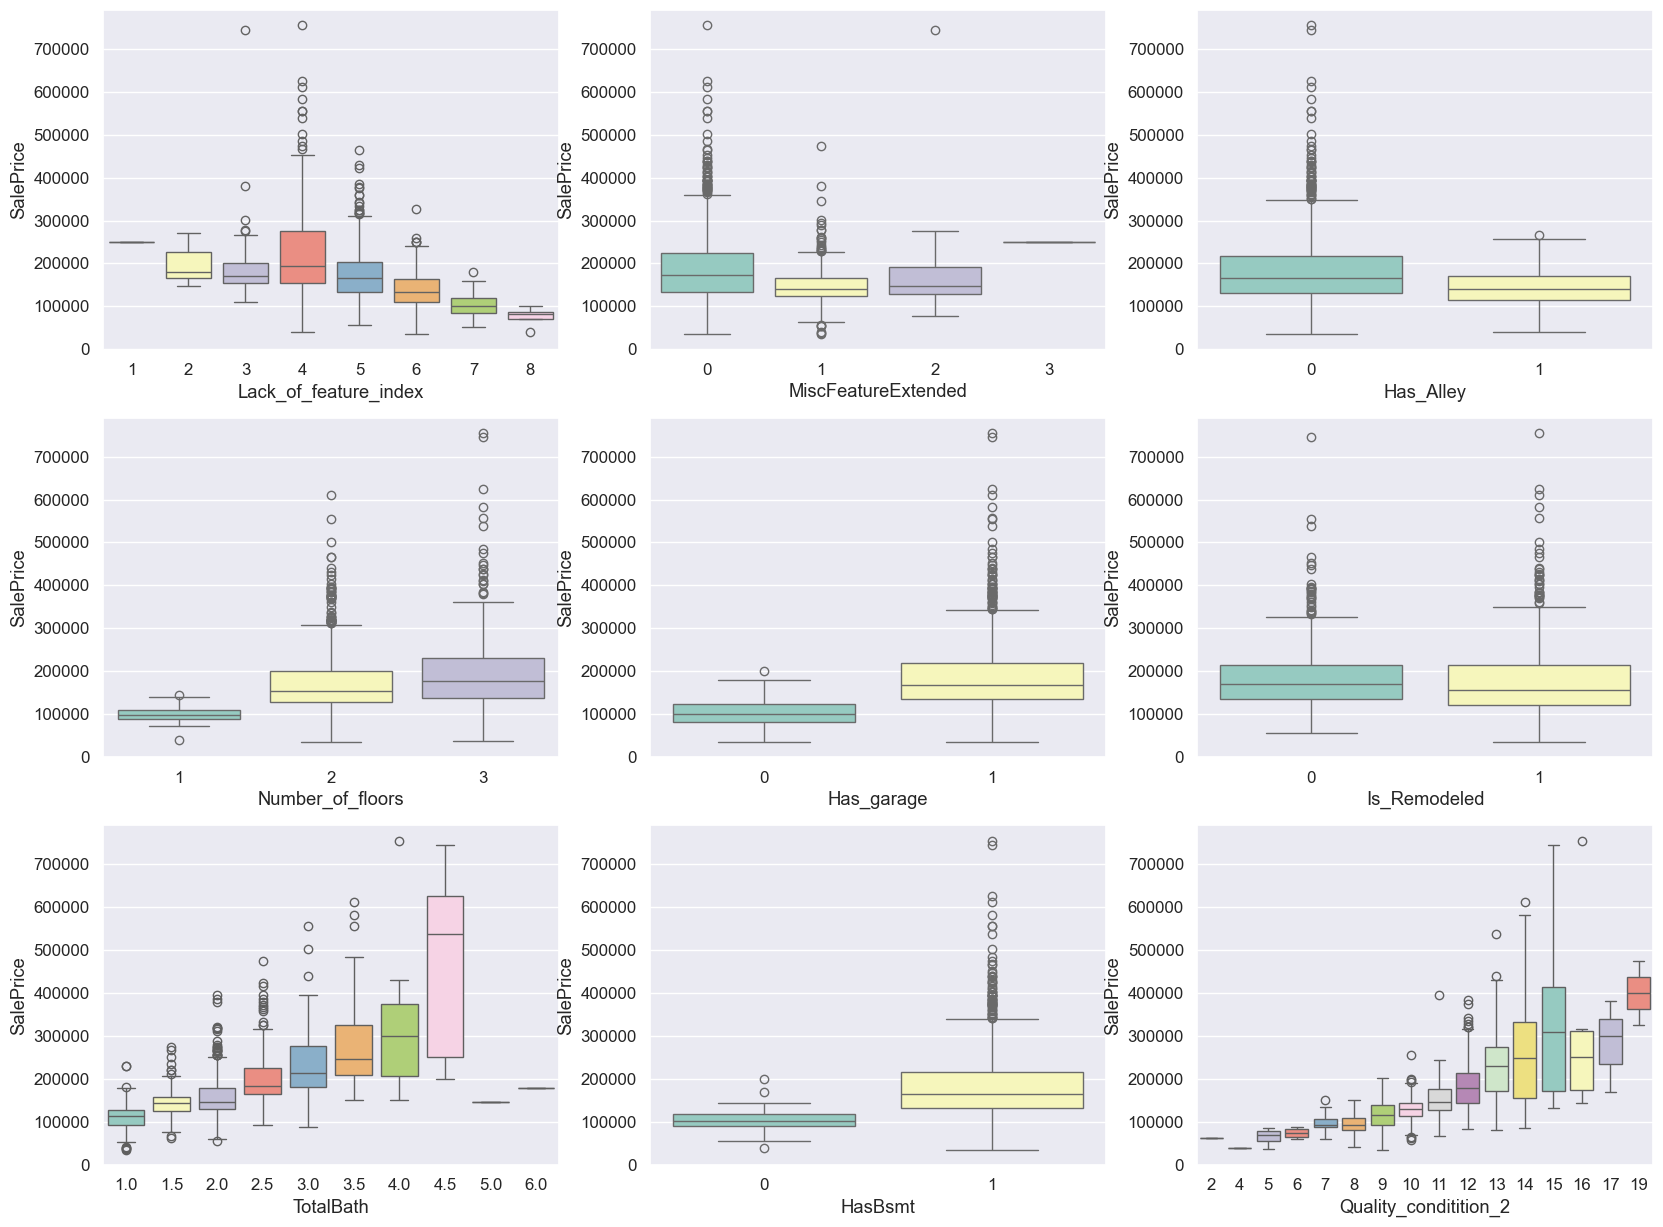

In [28]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
for var, subplot in zip(new_discrete_features, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=train_df, ax=subplot, palette='Set3')

In [30]:
### 更新特征列表以便于管理和记录
categorical_features = [feature for feature in train_df.columns if
                        train_df[feature].dtype == "object"]

ordinal_features = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                    'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
                    'GarageQual',
                    'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

nominal_features = list(set(categorical_features) - set(ordinal_features))

numerical_features = list(set(train_df.columns) - set(categorical_features))

## 将要删除的列

在预处理阶段，我最初决定删除以下特征，但这导致模型评分略有下降，因此决定保留它们。
需要注意的是，删除这些列可能会带来一定的速度提升。

* 无信息列：MoSold, BsmtFinSF2, 3SsnPorch, YrSold, Street, Condition2, PoolQC, Utilities
* 缺失值较多的列：PoolQC, MiscFeature, Alley, Fence
* 预处理相关决策列：FireplaceQu, GarageYrBlt, YearBuilt, YearRemodAdd

In [ ]:
#columns_dropped = ["MoSold","BsmtFinSF2","3SsnPorch","YrSold","Street","Condition2","PoolQC","Utilities",
#"PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageYrBlt","YearBuilt","YearRemodAdd"]

# 预处理

到目前为止，我们尝试理解数据集并决定创建一些新特征。请记住，本笔记本的主要目标之一是通过流水线（pipeline）处理所有预处理步骤。流水线的优点包括：

* 它们有助于避免状态转换中的数据泄漏，从而防止过拟合。
* 无需手动跟踪训练集和测试集中的预处理步骤。
* 最终得到一个可直接部署的模型。

在这里，我将根据以下决策构建预处理步骤的模块：

#### 缺失值处理：

* 根据数据描述填充缺失值（即数值型特征缺失值填充为0，类别型特征缺失值填充为'Do_not_have_this_feature'）

#### 类别数据处理：

* 对有序类别特征使用有序编码，对其他类别特征使用独热编码

#### 数值数据处理：

* 对于线性模型和支持向量机，进行特征缩放，并对偏态特征应用幂变换（幂变换仅限于连续特征）
* 对于树模型，不进行缩放，因为它们不需要

#### 目标变量处理：

* 对于线性模型和支持向量机，对目标变量使用对数变换（TransformedTargetRegressor非常有用）

#### 新特征创建：

* 在流水线中添加自定义转换器以创建新特征


<a id = "7"></a><br>
## 树预处理

Sklearn 提供了许多有用的预处理函数。对于缺失值填充和独热编码，我将使用这些内置函数。
对于有序编码，则需要额外一些工作。

In [31]:

# Preprocessing for numerical data

numerical_transformer = Pipeline(steps=[

    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])
# Preprocessing for categorical data
nominal_transformer = Pipeline(steps=[

    ('imputer', SimpleImputer(strategy='constant', fill_value='Do_not_have_this_feature')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [32]:
GarageQual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
Fence_map = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}
GarageFinish_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
KitchenQual_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
GarageCond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
HeatingQC_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
ExterQual_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
BsmtCond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
LandSlope_map = {'Gtl': 2, 'Mod': 1, 'Sev': 0}
ExterCond_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}
BsmtExposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
PavedDrive_map = {'Y': 2, 'P': 1, 'N': 0}
BsmtQual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
LotShape_map = {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}
BsmtFinType2_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
BsmtFinType1_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
FireplaceQu_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
Utilities_map = {"AllPub": 3, "NoSewr": 2, "NoSeWa": 1, "ELO": 0}
Functional_map = {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}
PoolQC_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}

In [33]:
ordinal_mapping = [{'col': col, 'mapping': globals()[col + '_map']}
                   for col in ordinal_features]

In [34]:
ordinal_transformer = ce.OrdinalEncoder(mapping=ordinal_mapping)

In [35]:
ordinal_transformer = Pipeline(steps=[

    ('ordinal_encoder', ce.OrdinalEncoder(mapping=ordinal_mapping))
])


**好的，我们的构建模块已经准备好了……让我们把它们组合起来**

In [36]:
# 合并树
tree_preprocessor = ColumnTransformer(remainder=numerical_transformer,
                                      transformers=[
                                          ('nominal_transformer', nominal_transformer, nominal_features),
                                          ('ordinal_transformer', ordinal_transformer, ordinal_features),
                                      ])

set_config(display="diagram")
tree_preprocessor

ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                             SimpleImputer(fill_value=0,
                                                           strategy='constant'))]),
                  transformers=[('nominal_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Do_not_have_this_feature',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['RoofMatl', 'GarageType', 'Exterior1st',
                                  'Street', 'Condi...
dtype: int64},
                                                                          {'col': 'Fence',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': GdPrv    4
MnPrv    3
GdWo     2
MnWw     1
NA       0
dtype: int64}]))]),
                                 ['LotShape', 'Utilities', 'LandSlope',
                                  'ExterQual', 'ExterCond', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                                  'Functional', 'FireplaceQu', 'GarageFinish',
                                  'GarageQual', 'GarageCond', 'PavedDrive',
                                  'PoolQC', 'Fence'])])

## 线性处理

对于线性模型和支持向量机，我们需要对数值数据进行额外的预处理。对数值特征进行缩放和处理偏态分布，有助于提升模型性能和加快收敛速度。

同时，目标变量的变换也有助于提升性能。我们将在建模阶段通过使用 TransformedTargetRegressor 来实现目标变量的对数变换。

In [37]:
# Preprocessing for numerical data
numerical_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('Scaller', StandardScaler()),

])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[

    ('imputer', SimpleImputer(strategy='constant', fill_value='Do_not_have_this_feature')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

由于线性模型假设特征服从正态分布，偏态特征会影响其性能（至少在理论上如此）。
因此，我们需要对偏态特征进行处理。让我们观察特征的偏度情况。

In [38]:
skew_features = train_df.select_dtypes(exclude=['object']).skew().sort_values(ascending=False)
skew_features = pd.DataFrame({'Skew': skew_features})
skew_features.style.background_gradient('rocket')

In [39]:
# 仅保留连续特征进行偏度处理
skewed_features = [
    'MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF', 'BsmtFinSF2', 'ScreenPorch',
    'EnclosedPorch', 'Lot_occupation', 'MasVnrArea', 'OpenPorchSF',
    'Area_Qual_Cond_Indicator', 'LotFrontage', 'WoodDeckSF', 'Area_Quality_Indicator', 'Outside_live_area']


In [40]:
skewness_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('PowerTransformer', PowerTransformer(method='yeo-johnson', standardize=True)),
])

In [41]:
# 合并 linear 和 SVR
linear_preprocessor = ColumnTransformer(remainder=numerical_transformer2,
                                        transformers=[
                                            ('skewness_transformer', skewness_transformer, skewed_features),
                                            ('nominal_transformer', nominal_transformer, nominal_features),
                                            ('ordinal_transformer', ordinal_transformer, ordinal_features),

                                        ])

linear_preprocessor

ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                             SimpleImputer(fill_value=0,
                                                           strategy='constant')),
                                            ('Scaller', StandardScaler())]),
                  transformers=[('skewness_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('PowerTransformer',
                                                  PowerTransformer())]),
                                 ['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch',
                                  'LowQualFinSF',...
dtype: int64},
                                                                          {'col': 'Fence',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': GdPrv    4
MnPrv    3
GdWo     2
MnWw     1
NA       0
dtype: int64}]))]),
                                 ['LotShape', 'Utilities', 'LandSlope',
                                  'ExterQual', 'ExterCond', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                                  'Functional', 'FireplaceQu', 'GarageFinish',
                                  'GarageQual', 'GarageCond', 'PavedDrive',
                                  'PoolQC', 'Fence'])])

## 一个用于特征工程的自定义管道

Sklearn 提供了许多内置函数来创建流水线（pipelines）。然而，对于特定问题的需求，你可能需要创建自定义的流水线。Sklearn 允许通过继承基类（BaseEstimator、TransformerMixin）或使用 FunctionTransformer 来实现。FunctionTransformer 更加方便，但它仅适用于无状态的转换（即不依赖于数据集分布的转换）。

这里，我使用了第一种方法。如果你不熟悉自定义流水线，可以阅读这篇文章（https://www.kaggle.com/code/lucabasa/understand-and-use-a-pipeline/notebook）。

In [43]:
class FeatureCreator1(BaseEstimator, TransformerMixin):
    def __init__(self, add_attributes=True):

        self.add_attributes = add_attributes

    def fit(self, X, y=None):

        return self

    def transform(self, X):

        if self.add_attributes:
            X_copy = X.copy()
            X_copy["Lack_of_feature_index"] = X_copy[["Street", "Alley", "MasVnrType", "GarageType", "MiscFeature",
                                                      'BsmtQual',
                                                      'FireplaceQu', 'PoolQC', 'Fence']].isnull().sum(axis=1) + (
                                                      X_copy["MasVnrType"] == 'None') + (
                                                      X_copy["CentralAir"] == 'No')
            X_copy["MiscFeatureExtended"] = (
                    X_copy["PoolQC"].notnull() * 1 + X_copy["MiscFeature"].notnull() * 1 + X_copy[
                "Fence"].notnull() * 1).astype('int64')
            X_copy["Has_Alley"] = X_copy["Alley"].notnull().astype('int64')
            X_copy["Lot_occupation"] = X_copy["GrLivArea"] / X_copy["LotArea"]
            X_copy["Number_of_floors"] = (X_copy["TotalBsmtSF"] != 0).astype('int64') + (
                    X_copy["1stFlrSF"] != 0).astype('int64') + (X_copy["2ndFlrSF"] != 0).astype('int64')
            X_copy['Total_Close_Live_Area'] = X_copy['GrLivArea'] + X_copy['TotalBsmtSF']
            X_copy['Outside_live_area'] = X_copy['WoodDeckSF'] + X_copy['OpenPorchSF'] + X_copy['EnclosedPorch'] + \
                                          X_copy['3SsnPorch'] + X_copy['ScreenPorch']
            X_copy['Total_usable_area'] = X_copy['Total_Close_Live_Area'] + X_copy['Outside_live_area']
            X_copy['Area_Quality_Indicator'] = X_copy['Total_usable_area'] * X_copy['OverallQual']
            X_copy['Area_Qual_Cond_Indicator'] = X_copy['Total_usable_area'] * X_copy['OverallQual'] * X_copy[
                'OverallCond']
            X_copy['TotalBath'] = (X_copy['FullBath'] + (0.5 * X_copy['HalfBath']) + X_copy['BsmtFullBath'] + (
                    0.5 * X_copy['BsmtHalfBath']))
            X_copy["Has_garage"] = X_copy["GarageYrBlt"].notnull().astype('int64')
            X_copy['House_Age'] = X_copy['YrSold'] - X_copy['YearBuilt']
            X_copy["Is_Remodeled"] = (X_copy["YearBuilt"] != X_copy["YearRemodAdd"]).astype('int64')
            X_copy['HasBsmt'] = X_copy['BsmtQual'].notnull().astype('int64')
            X_copy['Quality_conditition'] = X_copy['OverallQual'] * X_copy['OverallCond']
            X_copy['Quality_conditition_2'] = X_copy['OverallQual'] + X_copy['OverallCond']
            X_copy['House_Age2'] = X_copy['YrSold'] - X_copy['YearRemodAdd']
            X_copy['Quality_conditition'] = X_copy['OverallQual'] * X_copy['OverallCond']
            X_copy['Quality_conditition_2'] = X_copy['OverallQual'] + X_copy['OverallCond']
            X_copy['House_Age2'] = X_copy['YrSold'] - X_copy['YearRemodAdd']
            return X_copy
        else:
            X_copy = X.copy()
            return X_copy

In [44]:
Creator1 = FeatureCreator1(add_attributes=True)

# 将所有部分组合在一起

好的……我们已经创建了构建流水线所需的各个部分。现在让我们把它们整合到一起。

一些新特征专门统计了缺失值（'NA'），因此我会将特征创建器放在最前面（在任何填补缺失值之前）。
接下来是预处理模块
最后，我们会在末尾添加一个回归算法
让我们创建一个流水线并进行可视化。

In [45]:
pipe_xgb = Pipeline(steps=[
    ('Creator1', Creator1),
    ('tree_preprocessor', tree_preprocessor),
    ('regressor1', XGBRegressor(random_state=1)),
])
pipe_xgb

Pipeline(steps=[('Creator1', FeatureCreator1()),
                ('tree_preprocessor',
                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                              SimpleImputer(fill_value=0,
                                                                            strategy='constant'))]),
                                   transformers=[('nominal_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Do_not_have_this_feature',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

对于线性模型，我们将额外进行目标变量的变换。我将使用 TransformedTargetRegressor 来封装我们的流水线。
让我们来看一个示例。

In [46]:
pipe_Lasso = Pipeline(steps=[
    ('Creator1', Creator1),
    ('linear_preprocessor', linear_preprocessor),
    ('regressor2', Lasso()),
])

TargetTransformedLasso = TransformedTargetRegressor(regressor=pipe_Lasso, func=np.log1p, inverse_func=np.expm1)
TargetTransformedLasso

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('Creator1',
                                                      FeatureCreator1()),
                                                     ('linear_preprocessor',
                                                      ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                                                                   SimpleImputer(fill_value=0,
                                                                                                                 strategy='constant')),
                                                                                                  ('Scaller',
                                                                                                   StandardScaler())]),
                                                                        transformers=[('skewness_transformer',
                                                                                       Pipeline(steps=[('impu...
                                                                                                                                 'data_type': dtype('O'),
                                                                                                                                 'mapping': GdPrv    4
MnPrv    3
GdWo     2
MnWw     1
NA       0
dtype: int64}]))]),
                                                                                       ['LotShape',
                                                                                        'Utilities',
                                                                                        'LandSlope',
                                                                                        'ExterQual',
                                                                                        'ExterCond',
                                                                                        'BsmtQual',
                                                                                        'BsmtCond',
                                                                                        'BsmtExposure',
                                                                                        'BsmtFinType1',
                                                                                        'BsmtFinType2',
                                                                                        'HeatingQC',
                                                                                        'KitchenQual',
                                                                                        'Functional',
                                                                                        'FireplaceQu',
                                                                                        'GarageFinish',
                                                                                        'GarageQual',
                                                                                        'GarageCond',
                                                                                        'PavedDrive',
                                                                                        'PoolQC',
                                                                                        'Fence'])])),
                                                     ('regressor2', Lasso())]))

好的……我们几乎准备好开始建模了。在继续之前，我们将对保留给流水线的数据进行初步处理。我会先剔除异常值并更新特征列表。除异常值剔除外的所有预处理步骤都将在流水线中完成。

In [47]:
# 剔除异常值
pipe_data = pipe_data.drop(pipe_data[(pipe_data['GrLivArea'] > 4000)
                                     & (pipe_data['SalePrice'] < 200000)].index)
pipe_data = pipe_data.drop(pipe_data[(pipe_data['GarageArea'] > 1200)
                                     & (pipe_data['SalePrice'] < 300000)].index)
pipe_data = pipe_data.drop(pipe_data[(pipe_data['TotalBsmtSF'] > 4000)
                                     & (pipe_data['SalePrice'] < 200000)].index)
pipe_data = pipe_data.drop(pipe_data[(pipe_data['1stFlrSF'] > 4000)
                                     & (pipe_data['SalePrice'] < 200000)].index)

pipe_data = pipe_data.drop(pipe_data[(pipe_data['TotRmsAbvGrd'] > 12)
                                     & (pipe_data['SalePrice'] < 230000)].index)

y = pipe_data.SalePrice
pipe_data = pipe_data.drop("SalePrice", axis=1)


In [48]:
### 更新特征列表以便于管理和记录
categorical_features = [feature for feature in pipe_data.columns if
                        pipe_data[feature].dtype == "object"]

ordinal_features = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                    'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
                    'GarageQual',
                    'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

nominal_features = list(set(categorical_features) - set(ordinal_features))

numerical_features = list(set(pipe_data.columns) - set(categorical_features))

# 建模与超参数调优

我使用了 Optuna 包进行超参数调优。对于线性模型，我采用了单阶段调优。对于集成模型，我根据前几次迭代的结果，通过扩大或缩小超参数空间进行了多次迭代。

这里我只演示一个使用 ElasticNet 回归器的示例。其他算法的代码块我放在附录中，供有需要的人参考。

In [49]:
import optuna
from optuna.samplers import TPESampler
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

## Elasticnet 例子

In [50]:
def objective(trial):
    max_iter = trial.suggest_int("max_iter", 1000, 4000)
    alpha = trial.suggest_float("alpha", 1e-4, 1000, log=True)
    l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0, step=0.05)
    tol = trial.suggest_float("tol", 1e-6, 1e-3, log=True)

    ElasticNet_regressor = ElasticNet(max_iter=max_iter, alpha=alpha, tol=tol, l1_ratio=l1_ratio, random_state=1)

    # -- Make a pipeline
    ElasticNet_pipeline = make_pipeline(Creator1, linear_preprocessor, ElasticNet_regressor)

    ElasticNet_model = TransformedTargetRegressor(regressor=ElasticNet_pipeline, func=np.log1p, inverse_func=np.expm1)

    ss = ShuffleSplit(n_splits=5, test_size=0.2,
                      random_state=0)  #ShuffleSplit will help you to keep distributions of training data and folds similar)
    score = cross_val_score(ElasticNet_model, pipe_data, y, scoring=make_scorer(mean_absolute_error), cv=ss)
    score = score.mean()
    return score


sampler = TPESampler(seed=42)  # create a seed for the sampler for reproducibility
study = optuna.create_study(direction="minimize", sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2025-06-20 22:14:48,595] A new study created in memory with name: no-name-c96c819d-00da-4cba-8fe5-056ee7d8e12a
[I 2025-06-20 22:14:49,130] Trial 0 finished with value: 55030.748732463035 and parameters: {'max_iter': 2123, 'alpha': 451.85609510240965, 'l1_ratio': 0.75, 'tol': 6.251373574521755e-05}. Best is trial 0 with value: 55030.748732463035.
[I 2025-06-20 22:14:50,326] Trial 1 finished with value: 12830.791146881831 and parameters: {'max_iter': 1468, 'alpha': 0.0012358382772306934, 'l1_ratio': 0.05, 'tol': 0.0003967605077052988}. Best is trial 1 with value: 12830.791146881831.
[I 2025-06-20 22:14:52,384] Trial 2 finished with value: 24859.124770976494 and parameters: {'max_iter': 2803, 'alpha': 9.047071957568372, 'l1_ratio': 0.0, 'tol': 0.0008123245085588687}. Best is trial 1 with value: 12830.791146881831.
[I 2025-06-20 22:14:53,412] Trial 3 finished with value: 12886.764069752773 and parameters: {'max_iter': 3498, 'alpha': 0.003064599841241145, 'l1_ratio': 0.15000000000000002,

我想在这里添加一些可视化图表。这些图表可以通过 Optuna 的可视化函数轻松生成，对于理解调参过程非常有帮助。

In [51]:
plot_optimization_history(study)

历史数据显示，在调优过程的初期，目标值出现了一些波动。但最终，Optuna成功找到了一个合适的超参数范围，波动趋于稳定。我们可以得出结论，进一步的迭代不会带来太大帮助。

In [52]:
plot_slice(study)

In [53]:
plot_contour(study)

切片图和等高线图对于理解哪些参数在哪个范围内表现良好非常有用。可以观察到较低的 alpha 和 tol 通常效果较好。

In [54]:
plot_param_importances(study)

我认为最有用的图是参数重要性图，它非常直观易懂。

# 所有调优后的回归器

好的！我对所有回归器的调参方式都类似于 ElasticNet。下面列出它们调优后的版本及对应的超参数。需要注意的是，我只调优了算法特有的参数，你也可以调节流水线中的其他参数（例如，缩放类型或不同的缺失值填补方法）。

这里我暂时去掉了特征创建器部分，稍后会再加回来。（我不确定，但感觉如果所有回归器都使用同一个特征创建器，可能会提升速度。如果你有意见，欢迎随时分享。）

In [56]:
xgb_tunned = XGBRegressor(n_estimators=6500,
                          alpha=1.7938525031017074e-09,
                          subsample=0.3231512729662032,
                          colsample_bytree=0.25528017285233484,
                          max_depth=5,
                          min_child_weight=2,
                          learning_rate=0.004828231865923587,
                          gamma=0.0026151163125498213,
                          random_state=1)

pipe_xgb = Pipeline(steps=[

    ('tree_preprocessor', tree_preprocessor),
    ('regressor1', xgb_tunned),
])

gbm_tunned = GradientBoostingRegressor(n_estimators=5500,
                                       max_depth=5,
                                       min_samples_leaf=14,
                                       learning_rate=0.006328507206504974,
                                       subsample=0.9170443266552768,
                                       max_features='sqrt',
                                       random_state=1)

pipe_gbm = Pipeline(steps=[

    ('tree_preprocessor', tree_preprocessor),
    ('regressor2', gbm_tunned),
])

lgbm_tunned = LGBMRegressor(n_estimators=7000,
                            max_depth=7,
                            learning_rate=0.002536841439596437,
                            min_data_in_leaf=22,
                            subsample=0.7207500503954922,
                            max_bin=210,
                            feature_fraction=0.30010067215105635,
                            random_state=1,
                            verbosity=-1)

pipe_lgbm = Pipeline(steps=[

    ('tree_preprocessor', tree_preprocessor),
    ('regressor3', lgbm_tunned),
])

catboost_tunned = CatBoostRegressor(iterations=4500,
                                    colsample_bylevel=0.05367479984702603,
                                    learning_rate=0.018477566955501026, random_strength=0.1321272840705348,
                                    depth=6,
                                    l2_leaf_reg=4,
                                    boosting_type='Plain',
                                    bootstrap_type='Bernoulli',
                                    subsample=0.7629052520889268,
                                    logging_level='Silent',
                                    random_state=1)

pipe_catboost = Pipeline(steps=[
    ('tree_preprocessor', tree_preprocessor),
    ('regressor4', catboost_tunned),
])

elasticnet_tunned = ElasticNet(max_iter=3993,
                               alpha=0.0007824887724782356,
                               l1_ratio=0.25,
                               tol=3.78681184748232e-06,
                               random_state=1)

pipe_Elasticnet = Pipeline(steps=[

    ('linear_preprocessor', linear_preprocessor),
    ('regressor5', elasticnet_tunned),
])

TargetTransformedElasticnet = TransformedTargetRegressor(regressor=pipe_Elasticnet, func=np.log1p,
                                                         inverse_func=np.expm1)

lasso_tunned = Lasso(max_iter=2345,
                     alpha=0.00019885959230548468,
                     tol=2.955506894549702e-05,
                     random_state=1)

pipe_Lasso = Pipeline(steps=[

    ('linear_preprocessor', linear_preprocessor),
    ('regressor6', lasso_tunned),
])

TargetTransformedLasso = TransformedTargetRegressor(regressor=pipe_Lasso, func=np.log1p, inverse_func=np.expm1)

ridge_tunned = Ridge(max_iter=1537,
                     alpha=6.654338887411367,
                     tol=8.936831872581897e-05,
                     random_state=1)

pipe_Ridge = Pipeline(steps=[

    ('linear_preprocessor', linear_preprocessor),
    ('regressor7', ridge_tunned),
])

TargetTransformedRidge = TransformedTargetRegressor(regressor=pipe_Ridge, func=np.log1p, inverse_func=np.expm1)

svr_tunned = SVR(kernel='linear',
                 C=0.019257948556667938,
                 epsilon=0.016935170969518305,
                 tol=0.0006210492106739069)

pipe_SVR = Pipeline(steps=[

    ('linear_preprocessor', linear_preprocessor),
    ('regressor8', svr_tunned),
])

TargetTransformedSVR = TransformedTargetRegressor(regressor=pipe_SVR, func=np.log1p, inverse_func=np.expm1)

# 堆叠

我们现在已经得到了训练和调优好的模型。我将把它们进行堆叠，希望能带来性能提升。（这里没有包含各个单独回归器的表现。堆叠相比表现最好的回归器（XGBoost）大约提升了5%的效果。）

关于堆叠的具体过程我就不详细讲了，因为网上有很多很好的笔记本介绍。我这里只放了一张参考图，供不熟悉堆叠的人参考。堆叠就是利用基学习器（这里是回归器）在训练集的交叉验证中产生的预测结果，作为新的特征输入给一个元学习器，最终由元学习器给出预测结果。

好的，我们来构建最终的流水线。我尝试了不同的算法作为元回归器，Lasso表现最好。

我使用网格搜索来调优元回归器，这个过程耗时适中。因此我将alpha的取值范围限制得比较小。


In [58]:
estimators = [
    ("pipe_xgb", pipe_xgb),
    ("pipe_gbm", pipe_gbm),
    ("pipe_lgbm", pipe_lgbm),
    ("pipe_catboost", pipe_catboost),
    ("TargetTransformedElasticnet", TargetTransformedElasticnet),
    ("TargetTransformedLasso", TargetTransformedLasso),
    ("TargetTransformedRidge", TargetTransformedRidge),
    ("TargetTransformedSVR", TargetTransformedSVR)
]


In [59]:
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=Lasso(alpha=0.01, random_state=1))

In [ ]:
#grid_params = {

#'stacking_regressor__final_estimator__alpha': [0.0001, 0.01, 1, 10]

#}


#ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar   

#stack_search = GridSearchCV(final_pipe, param_grid = grid_params,scoring= make_scorer(mean_absolute_error), cv = ss, n_jobs = -1)

#stack_search.fit(pipe_data, y)

In [60]:
final_pipe = Pipeline(steps=[
    ('Creator1', Creator1),
    ('stacking_regressor', stacking_regressor),
])
final_pipe

Pipeline(steps=[('Creator1', FeatureCreator1()),
                ('stacking_regressor',
                 StackingRegressor(estimators=[('pipe_xgb',
                                                Pipeline(steps=[('tree_preprocessor',
                                                                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                                                                              SimpleImputer(fill_value=0,
                                                                                                                            strategy='constant'))]),
                                                                                   transformers=[('nominal_transformer',
                                                                                                  Pipeline(steps=[('imputer',
                                                                                                                   SimpleImputer(fill_value='Do_not...
                                                                                                                                        'BsmtCond',
                                                                                                                                        'BsmtExposure',
                                                                                                                                        'BsmtFinType1',
                                                                                                                                        'BsmtFinType2',
                                                                                                                                        'HeatingQC',
                                                                                                                                        'KitchenQual',
                                                                                                                                        'Functional',
                                                                                                                                        'FireplaceQu',
                                                                                                                                        'GarageFinish',
                                                                                                                                        'GarageQual',
                                                                                                                                        'GarageCond',
                                                                                                                                        'PavedDrive',
                                                                                                                                        'PoolQC',
                                                                                                                                        'Fence'])])),
                                                                                                     ('regressor8',
                                                                                                      SVR(C=0.019257948556667938,
                                                                                                          epsilon=0.016935170969518305,
                                                                                                          kernel='linear',
                                                                                                          tol=0.0006210492106739069))])))],
                                   final_estimator=Lasso(alpha=0.01,
                                                         random_state=1)))])

好吧……最终，我们得到了调优好的流水线，它能够完成特征工程、预处理以及预测。

让我们用它来生成提交结果吧……

In [61]:
stacked_regressor = final_pipe.fit(pipe_data, y)

In [66]:
preds_test = stacked_regressor.predict(pipe_test)

# 生成结果

In [85]:
print("生成提交文件……")

output = pd.DataFrame({'Id': pipe_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission_3.csv', index=False)

output.head()

生成提交文件……


Id      SalePrice
0  1461  123749.447898
1  1462  163375.616811
2  1463  188954.756123
3  1464  200020.325796
4  1465  191140.416908

# 附录

### 不同模型的Optuna调优设置

In [ ]:
#def objective(trial):

#    n_estimators1 = trial.suggest_int("n_estimators", 2000, 5000, step=500)
# L1 regularization weight.
#    alpha1 = trial.suggest_float("alpha", 1e-8, 1.0, log=True)
# sampling ratio for training data.
#    subsample1 = trial.suggest_float("subsample", 0.2, 1.0)
# sampling according to each tree.
#    colsample_bytree1 = trial.suggest_float("colsample_bytree", 0.4, 0.6)
# maximum depth of the tree, signifies complexity of the tree.
#    max_depth1 = trial.suggest_int("max_depth", 3, 10, step=2)
# minimum child weight, larger the term more conservative the tree.
#    min_child_weight1 = trial.suggest_int("min_child_weight", 1, 3)
# learning rate
#    learning_rate1 =  trial.suggest_float("learning_rate", 1e-6, 1, log=True)
# defines how selective algorithm is.
#    gamma1 = trial.suggest_float("gamma", 1e-8, 1.0, log=True)


#    xgb_regressor = XGBRegressor(n_estimators = n_estimators1,alpha=alpha1,subsample=subsample1,colsample_bytree=colsample_bytree1,
#                           max_depth=max_depth1,min_child_weight =min_child_weight1,learning_rate=learning_rate1,gamma=gamma1,eval_metric = 'mae',
#                           random_state =1)


# -- Make a pipeline
#    xgb_pipeline = make_pipeline(Creator1,tree_preprocessor, xgb_regressor)


#    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar)
#    score = cross_val_score(xgb_pipeline, pipe_data, y, scoring= make_scorer(mean_absolute_error),  cv=ss)
#    score = score.mean()
#    return score


#sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
#study = optuna.create_study(direction="minimize", sampler=sampler)
#study.optimize(objective, n_trials=100)

In [ ]:
#second level xgboost

#def objective(trial):

#    n_estimators1 = trial.suggest_int("n_estimators", 4000, 6000, step=500)
# L1 regularization weight.
#    alpha1 = trial.suggest_float("alpha", 1e-8, 1e-5, log=True)
# sampling ratio for training data.
#    subsample1 = trial.suggest_float("subsample", 0.3, 0.5)
# sampling according to each tree.
#    colsample_bytree1 = trial.suggest_float("colsample_bytree", 0.35, 0.56)
# maximum depth of the tree, signifies complexity of the tree.
#    max_depth1 = trial.suggest_int("max_depth", 3, 7, step=2)
# minimum child weight, larger the term more conservative the tree.
#    min_child_weight1 = trial.suggest_int("min_child_weight", 1, 3)
# learning rate
#    learning_rate1 =  trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
# defines how selective algorithm is.
#    gamma1 = trial.suggest_float("gamma", 1e-3, 1e-1, log=True)


#    xgb_regressor = XGBRegressor(n_estimators = n_estimators1,alpha=alpha1,subsample=subsample1,colsample_bytree=colsample_bytree1,
#                           max_depth=max_depth1,min_child_weight =min_child_weight1,learning_rate=learning_rate1,gamma=gamma1,eval_metric = 'mae',
#                           random_state =1)


# -- Make a pipeline
#    xgb_pipeline = make_pipeline(Creator1,tree_preprocessor, xgb_regressor)

#    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar)
#    score = cross_val_score(xgb_pipeline, pipe_data, y, scoring= make_scorer(mean_absolute_error),  cv=ss)
#    score = score.mean()
#    return score


#sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
#study = optuna.create_study(direction="minimize", sampler=sampler)
#study.optimize(objective, n_trials=100)

In [ ]:
#third level xgboost

#def objective(trial):

#    n_estimators1 = trial.suggest_int("n_estimators", 6000, 7000, step=500)
# L1 regularization weight.
#    alpha1 = trial.suggest_float("alpha", 1e-9, 1e-7, log=True)
# sampling ratio for training data.
#    subsample1 = trial.suggest_float("subsample", 0.3, 0.4)
# sampling according to each tree.
#    colsample_bytree1 = trial.suggest_float("colsample_bytree", 0.25, 0.45)
# maximum depth of the tree, signifies complexity of the tree.
#    max_depth1 = trial.suggest_int("max_depth", 3, 7, step=2)
# minimum child weight, larger the term more conservative the tree.
#    min_child_weight1 = trial.suggest_int("min_child_weight", 1, 3)
# learning rate
#    learning_rate1 =  trial.suggest_float("learning_rate", 1e-3, 1e-2, log=True)
# defines how selective algorithm is.
#    gamma1 = trial.suggest_float("gamma", 1e-3, 1e-1, log=True)


#    xgb_regressor = XGBRegressor(n_estimators = n_estimators1,alpha=alpha1,subsample=subsample1,colsample_bytree=colsample_bytree1,
#                           max_depth=max_depth1,min_child_weight =min_child_weight1,learning_rate=learning_rate1,gamma=gamma1,eval_metric = 'mae',
#                           random_state =1)


# -- Make a pipeline
#    xgb_pipeline = make_pipeline(Creator1,tree_preprocessor, xgb_regressor)

#    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar)
#    score = cross_val_score(xgb_pipeline, pipe_data, y, scoring= make_scorer(mean_absolute_error),  cv=ss)
#    score = score.mean()
#    return score


#sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
#study = optuna.create_study(direction="minimize", sampler=sampler)
#study.optimize(objective, n_trials=100)

In [ ]:
#first level gbm

#def objective(trial):


#    n_estimators = trial.suggest_int("n_estimators", 1500, 5000, step=500)
#    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 40, step=3)
#    max_depth = trial.suggest_int("max_depth", 2, 16, step=2)
#    learning_rate =  trial.suggest_float("learning_rate", 1e-4, 0.1, log=True)
#    subsample = trial.suggest_float("subsample", 0.5, 1.0, step=0.05)
#    max_features = trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"])        


#    gbm_regressor = GradientBoostingRegressor(n_estimators = n_estimators,min_samples_leaf=min_samples_leaf,max_depth=max_depth,
#                                        learning_rate=learning_rate, subsample=subsample, max_features = max_features, random_state =1)

# -- Make a pipeline
#    gbm_pipeline = make_pipeline(Creator1,tree_preprocessor, gbm_regressor)


#    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar)
#    score = cross_val_score(gbm_pipeline, pipe_data, y, scoring= make_scorer(mean_absolute_error),  cv=ss)
#    score = score.mean()
#    return score


#sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
#study = optuna.create_study(direction="minimize", sampler=sampler)
#study.optimize(objective, n_trials=100)


In [ ]:
#second level gbm

#def objective(trial):


#    n_estimators = trial.suggest_int("n_estimators", 5000, 6000, step=500)
#    min_samples_leaf = trial.suggest_int("min_samples_leaf", 10, 22, step=2)
#    max_depth = trial.suggest_int("max_depth", 2, 7, step=1)
#    learning_rate =  trial.suggest_float("learning_rate", 1e-3, 1e-2, log=True)
#    subsample = trial.suggest_float("subsample", 0.85, 0.95)
#    max_features = trial.suggest_categorical("max_features", [ "sqrt", "log2"])        


#    gbm_regressor = GradientBoostingRegressor(n_estimators = n_estimators,min_samples_leaf=min_samples_leaf,max_depth=max_depth,
#                                        learning_rate=learning_rate, subsample=subsample, max_features = max_features, random_state =1)

# -- Make a pipeline
#    gbm_pipeline = make_pipeline(Creator1,tree_preprocessor, gbm_regressor)


#    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar)
#    score = cross_val_score(gbm_pipeline, pipe_data, y, scoring= make_scorer(mean_absolute_error),  cv=ss)
#    score = score.mean()
#    return score


#sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
#study = optuna.create_study(direction="minimize", sampler=sampler)
#study.optimize(objective, n_trials=100)


In [ ]:
#catboost

#def objective(trial):

#    cat_param = {
#        "iterations" : trial.suggest_int("iterations", 4000, 6500, step=500),
#        "colsample_bylevel": trial.suggest_float("colsample_bylevel",  0.02, 0.5),
#        "learning_rate": trial.suggest_float("learning_rate",1e-3, 1e-2, log=True),
#        "random_strength": trial.suggest_float("random_strength",1e-2, 1, log=True),

#        "depth": trial.suggest_int("depth", 2, 12),
#        "l2_leaf_reg": trial.suggest_int("l2_leaf_reg", 1, 8),

#        "boosting_type": trial.suggest_categorical("boosting_type", ["Plain"]),
#        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bernoulli"])
#    }

#    if cat_param["bootstrap_type"] == "Bayesian":
#        cat_param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
#    elif cat_param["bootstrap_type"] == "Bernoulli":
#        cat_param["subsample"] = trial.suggest_float("subsample", 0.6, 1)


#    catboost_regressor = CatBoostRegressor(**cat_param,random_state =1, logging_level='Silent')

# -- Make a pipeline
#    catboost_pipeline = make_pipeline(Creator1,tree_preprocessor, catboost_regressor)


#    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar)
#    score = cross_val_score(catboost_pipeline, pipe_data, y, scoring= make_scorer(mean_absolute_error),  cv=ss)
#    score = score.mean()
#    return score


#sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
#study = optuna.create_study(direction="minimize", sampler=sampler)
#study.optimize(objective, n_trials=100)

In [ ]:
#first level lightgbm

#def objective(trial):


#    n_estimators = trial.suggest_int("n_estimators", 1500, 5000, step=500)
#    max_depth = trial.suggest_int("max_depth", 2, 14, step=2)
#    learning_rate =  trial.suggest_float("learning_rate", 1e-4, 0.1, log=True)
#    min_data_in_leaf = trial.suggest_int("min_data_in_leaf", 1, 40, step=3)
#    subsample = trial.suggest_float("subsample", 0.6, 1.0, step=0.05)        
#    max_bin = trial.suggest_int("max_bin", 200, 350, step=10),
#    feature_fraction = trial.suggest_float("feature_fraction", 0.3, 1.0, step=0.1)


#    lgbm_regressor = LGBMRegressor(n_estimators = n_estimators,max_depth=max_depth,learning_rate=learning_rate, min_data_in_leaf=min_data_in_leaf,
#                                         subsample=subsample,max_bin=max_bin,feature_fraction=feature_fraction, random_state =1)

# -- Make a pipeline
#    lgbm_pipeline = make_pipeline(Creator1,tree_preprocessor, lgbm_regressor)


#    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar)
#    score = cross_val_score(lgbm_pipeline, pipe_data, y, scoring= make_scorer(mean_absolute_error),  cv=ss)
#    score = score.mean()
#    return score


#sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
#study = optuna.create_study(direction="minimize", sampler=sampler)
#study.optimize(objective, n_trials=100)


In [ ]:
#second level lightgbm

#def objective(trial):


#    n_estimators = trial.suggest_int("n_estimators", 5500, 7000, step=500)
#    max_depth = trial.suggest_int("max_depth", 4, 12)
#    learning_rate =  trial.suggest_float("learning_rate", 1e-3, 1e-2, log=True)
#    min_data_in_leaf = trial.suggest_int("min_data_in_leaf", 21, 30)
#    subsample = trial.suggest_float("subsample", 0.6, 0.88)        
#    max_bin = trial.suggest_int("max_bin", 190, 230, step=10),
#    feature_fraction = trial.suggest_float("feature_fraction", 0.3, 0.5)


#    lgbm_regressor = LGBMRegressor(n_estimators = n_estimators,max_depth=max_depth,learning_rate=learning_rate, min_data_in_leaf=min_data_in_leaf,
#                                         subsample=subsample,max_bin=max_bin,feature_fraction=feature_fraction, random_state =1)

# -- Make a pipeline
#    lgbm_pipeline = make_pipeline(Creator1,tree_preprocessor, lgbm_regressor)


#    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar)
#    score = cross_val_score(lgbm_pipeline, pipe_data, y, scoring= make_scorer(mean_absolute_error),  cv=ss)
#    score = score.mean()
#    return score


#sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
#study = optuna.create_study(direction="minimize", sampler=sampler)
#study.optimize(objective, n_trials=100)

In [ ]:
#def objective(trial):

#    max_iter = trial.suggest_int("max_iter", 1000, 4000)
#    alpha =  trial.suggest_float("alpha", 1e-4, 1000, log=True) 
#    l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0, step=0.05)
#    tol =  trial.suggest_float("tol", 1e-6, 1e-3, log=True)


#    ElasticNet_regressor = ElasticNet(max_iter=max_iter, alpha=alpha,tol=tol, l1_ratio=l1_ratio, random_state =1)

# -- Make a pipeline
#    ElasticNet_pipeline = make_pipeline(Creator1,linear_preprocessor, ElasticNet_regressor)

#    ElasticNet_model = TransformedTargetRegressor(regressor=ElasticNet_pipeline, func=np.log1p, inverse_func=np.expm1)

#    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar)
#    score = cross_val_score(ElasticNet_model, pipe_data, y, scoring= make_scorer(mean_absolute_error),  cv=ss)
#    score = score.mean()
#    return score


#sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
#study = optuna.create_study(direction="minimize", sampler=sampler)
#study.optimize(objective, n_trials=100)

In [ ]:
#def objective(trial):


#    max_iter = trial.suggest_int("max_iter", 1000, 4000)
#    alpha =  trial.suggest_float("alpha", 1e-4, 1000, log=True) 
#    tol =  trial.suggest_float("tol", 1e-6, 1e-3, log=True)


#    Lasso_regressor = Lasso(max_iter=max_iter, alpha=alpha,tol=tol, random_state =1)

#    # -- Make a pipeline
#    Lasso_pipeline = make_pipeline(Creator1,linear_preprocessor, Lasso_regressor)

#    Lasso_model = TransformedTargetRegressor(regressor=Lasso_pipeline, func=np.log1p, inverse_func=np.expm1)

#    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar)
#    score = cross_val_score(Lasso_model, pipe_data, y, scoring= make_scorer(mean_absolute_error),  cv=ss)
#    score = score.mean()
#    return score


#sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
#study = optuna.create_study(direction="minimize", sampler=sampler)
#study.optimize(objective, n_trials=100)

In [ ]:
#def objective(trial):


#    max_iter = trial.suggest_int("max_iter", 1000, 4000)
#    alpha =  trial.suggest_float("alpha", 1e-4, 1000, log=True) 
#    tol =  trial.suggest_float("tol", 1e-6, 1e-3, log=True)


#    Ridge_regressor = Ridge(max_iter=max_iter, alpha=alpha, tol= tol, random_state =1)

# -- Make a pipeline
#    Ridge_pipeline = make_pipeline(Creator1,linear_preprocessor, Ridge_regressor)

#    Ridge_model = TransformedTargetRegressor(regressor=Ridge_pipeline, func=np.log1p, inverse_func=np.expm1)

#    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar)
#    score = cross_val_score(Ridge_model, pipe_data, y, scoring= make_scorer(mean_absolute_error),  cv=ss)
#    score = score.mean()
#    return score


#sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
#study = optuna.create_study(direction="minimize", sampler=sampler)
#study.optimize(objective, n_trials=100)

In [ ]:
#first level SVR
#Be careful higher C values takes too long or fails to converge

#def objective(trial):

#    param = {

#         "kernel": trial.suggest_categorical("kernel", ["linear",  "rbf"]),
#         "C": trial.suggest_float("C", 1, 1000, log=True),
#         "epsilon": trial.suggest_float("epsilon", 1e-3, 0.1, log=True),
#"tol": trial.suggest_float("tol", 1e-4, 1e-3, log=True)

#     }


#    if param["kernel"] ==  "rbf" :
#         gamma = trial.suggest_categorical("gamma", ["scale", "auto"])


#    SVR_regressor = SVR(**param, cache_size=800)

# -- Make a pipeline
#    SVR_pipeline = make_pipeline(Creator1,linear_preprocessor, SVR_regressor)

#    SVR_model = TransformedTargetRegressor(regressor=SVR_pipeline, func=np.log1p, inverse_func=np.expm1)
#    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar)
#    score = cross_val_score(SVR_model, pipe_data, y, scoring= make_scorer(mean_absolute_error),  cv=ss)     
#    score = score.mean()
#    return score


#sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
#study = optuna.create_study(direction="minimize", sampler=sampler)
#study.optimize(objective, n_trials=100)





In [ ]:
#second level SVR

#def objective(trial):

#    param = {

#         "kernel": trial.suggest_categorical("kernel", ["linear"]),
#         "C": trial.suggest_float("C", 1e-3, 10, log=True),
#         "epsilon": trial.suggest_float("epsilon", 1e-4, 0.1, log=True),
#"tol": trial.suggest_float("tol", 1e-4, 1e-3, log=True)

#     }


#    SVR_regressor = SVR(**param, cache_size=800)

# -- Make a pipeline
#    SVR_pipeline = make_pipeline(Creator1,linear_preprocessor, SVR_regressor)

#    SVR_model = TransformedTargetRegressor(regressor=SVR_pipeline, func=np.log1p, inverse_func=np.expm1)
#    ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #ShuffleSplit will help you to keep distributions of training data and folds similar)
#    score = cross_val_score(SVR_model, pipe_data, y, scoring= make_scorer(mean_absolute_error),  cv=ss)     
#    score = score.mean()
#    return score


#sampler = TPESampler(seed=42) # create a seed for the sampler for reproducibility
#study = optuna.create_study(direction="minimize", sampler=sampler)
#study.optimize(objective, n_trials=100)

###### 